# Projekt MSP1 / 2024
Cílem tohoto projektu je se seznámit s programovými nástroji využívaných ve statistice a osvojit si základní procedury. Projekt není primárně zaměřen na efektivitu využívání programového vybavení (i když úplně nevhodné konstrukce mohou mít vliv na hodnocení), ale nejvíce nás zajímají vaše statistické závěry a způsob vyhodnocení. Dbejte také na to, že každý graf musí splňovat nějaké podmínky - přehlednost, čitelnost, popisky.

V projektu budete analyzovat časy běhu šesti různých konfigurací algoritmů. Ke každé konfiguraci vzniklo celkem 200 nezávislých běhů, jejichž logy máte k dispozici v souboru [logfiles.zip](logfiles.zip).

Pokud nemáte rozchozené prostředí pro pro spouštění Jupyter notebooku, můžete využití službu [Google Colab](https://colab.google/). Jakákoliv spolupráce, sdílení řešení a podobně je zakázána!

S případnými dotazy se obracejte na Vojtěcha Mrázka (mrazek@fit.vutbr.cz).

__Odevzdání:__ tento soubor (není potřeba aby obsahoval výstupy skriptů) do neděle 27. 10. 2024 v IS VUT. Kontrola bude probíhat na Pythonu 3.12.3 (standardní instalace Ubuntu); neočekává se však to, že byste používali nějaké speciality a nekompatibilní knihovny. V případě nesouladu verzí a podobných problémů budete mít možnost reklamace a prokázání správnosti funkce. Bez vyplnění vašich komentářů a závěrů do označených buněk nebude projekt hodnocen!

__Upozornění:__ nepřidávejte do notebooku další buňky, odpovídejte tam, kam se ptáme (textové komentáře do Markdown buněk)

__Tip:__ před odevzdáním resetujte celý notebook a zkuste jej spustit od začátku. Zamezíte tak chybám krokování a editací, kdy výsledek z buňky na konci použijete na začátku.

__OTÁZKA K DOPLNĚNÍ:__

_Alexej Beňuš xbenus01_

## Načtení potřebných knihoven
Načtěte knihovny, které jsou nutné pro zpracování souborů a práci se statistickými funkcemi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import json
from zipfile import ZipFile

## Načtení dat do DataFrame
Ze souboru `logfiles.zip` umístěném ve stejném adresáři načtěte data a vytvořte Pandas DataFrame.

Výsledky jsou uložené ve formátu JSON - pro zpracování použijte knihovnu `json`.
Můžete využít následující kostru - je vhodné pracovat přímo se ZIP souborem. Jedinou nevýhodou může být to, že vám bude vracet _byte_ objekt, který musíte přes funkci `decode` zpracovat.

Upravte také pomocí funkce `.astype()` datové typy patřičných sloupců.

```py
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        # TODO test názvu souboru
        with zf.open(filename, "r") as f:
            pass # vytvořte slovník

df = pd.DataFrame(data)
df
```

In [2]:
# TODO
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        if not filename.endswith(".json"):
            continue
        with zf.open(filename, "r") as file:
            data.append(json.load(file))


df = pd.DataFrame(data)
print(df)
print(df.dtypes)

     configuration  run     runtime   status
0          config6  149   53.733556  SUCCESS
1          config2   16  134.543496  SUCCESS
2          config6  180  117.108040  SUCCESS
3          config4   12  223.763044  SUCCESS
4          config5  193  159.540473  SUCCESS
...            ...  ...         ...      ...
1195       config5   95  199.461297  SUCCESS
1196       config5   99  155.491930  SUCCESS
1197       config2   83  125.243690  SUCCESS
1198       config5  153  223.312938  SUCCESS
1199       config1  137   96.779385  SUCCESS

[1200 rows x 4 columns]
configuration     object
run                int64
runtime          float64
status            object
dtype: object


## Analýza a čištění dat
Vhodným způsobem pro všechny konfigurace analyzujte časy běhů a pokud tam jsou, identifikujte hodnoty, které jsou chybné. Vyberte vhodný graf, který zobrazí samostatně jednotlivé konfigurace.

Text(0, 0.5, 'Runtime')

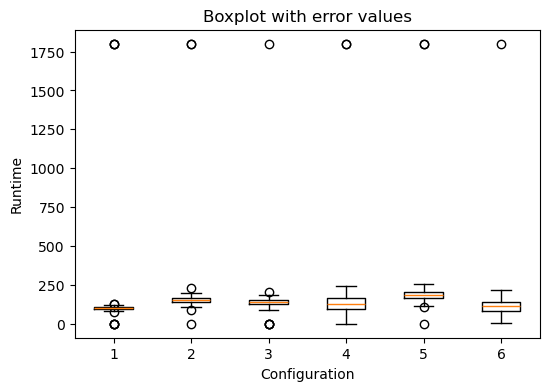

In [3]:
# List of expected configurations
config1 = df["configuration"] == "config1"
config2 = df["configuration"] == "config2"
config3 = df["configuration"] == "config3"
config4 = df["configuration"] == "config4"
config5 = df["configuration"] == "config5"
config6 = df["configuration"] == "config6"

# Boxplot
y = [df[config1]["runtime"], df[config2]["runtime"], df[config3]["runtime"], df[config4]["runtime"], df[config5]["runtime"], df[config6]["runtime"]]
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(y)
ax.set_title("Boxplot with error values")
ax.set_xlabel("Configuration")
ax.set_ylabel("Runtime")

__OTÁZKA K DOPLNĚNÍ:__

_Objevily se nějaké chybné hodnoty? Proč tam jsou s ohledem na to, že se jedná o běhy algoritmů? Proč jste zvolili tento typ grafu?_

**Vysvětlení**

Pro analýzu dat jsem vybral boxplot graf. Anomálie na něm jdou vidět velice dobře. Ačkoliv by se také dal použít "klasický" graf, do kterého by se vložily všechny data - šlo by v něm vidět všechny vystřelení k vysokým číslům, ale vzhledem k velikosti vysokých odchylek by mohlo jít hůře vidět anomálie u 0.

U všech konfigurací jde vidět že mají anomálie blížící se jak k 0, tak k nesmyslně velkým časům. To jde na grafu jednoduše vidět pomocí teček, které symbolizují outliers.

Data jsem vyčistil od průběhů které neskončily "success" a zároveň časy menší nebo rovno 0.

Také mě napadlo použít vzorce pro výpočet outliers z prezentace z dema od pana Mrázka, ale nechtěl jsem smazat i některé průběhy, které vyšly velice rychle jenom "náhodou", abych neznehodnotil zbytek dat, tak jsem zvolil cestu kdy smažu jenom data u kterých vím že tam 100% být nemají.

Vyčistěte dataframe `df` tak, aby tam tyto hodnoty nebyly a ukažte znovu analýzu toho, že čištění dat bylo úspěšné. Odtud dále pracujte s vyčištěným datasetem.

Text(0, 0.5, 'Runtime')

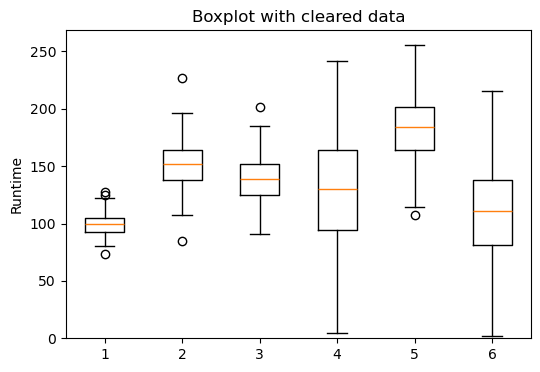

In [4]:
# smaž neúspěšné hodnoty
df.drop(df[df["status"] != "SUCCESS"].index, inplace=True)

# smaž nulové hodnoty
df.drop(df[df["runtime"] <= 0].index, inplace=True)

#hodnoty pro jednotlivé konfigurace - bool pole
config1 = df["configuration"] == "config1"
config2 = df["configuration"] == "config2"
config3 = df["configuration"] == "config3"
config4 = df["configuration"] == "config4"
config5 = df["configuration"] == "config5"
config6 = df["configuration"] == "config6"

#boxplot s vyčištěnými daty
y = [df[config1]["runtime"], df[config2]["runtime"], df[config3]["runtime"], df[config4]["runtime"], df[config5]["runtime"], df[config6]["runtime"]]
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(y)
ax.set_title("Boxplot with cleared data")
ax.set_ybound(0)
ax.set_ylabel("Runtime")

## Deskriptivní popis hodnot
Vypište pro jednotlivé konfigurace základní deskriptivní parametry.  

__TIP__ pokud výsledky uložíte jako Pandas DataFrame, zobrazí se v tabulce.

In [5]:
# deskriptivní statistika
df.groupby("configuration")["runtime"].describe()

,count,mean,std,min,25%,50%,75%,max
configuration,,,,,,,,
config1,193.0,99.590413,9.386788,73.802549,92.979469,99.865028,104.824724,127.201692
config2,197.0,151.732975,19.833198,85.174653,137.995662,151.516091,163.802880,227.054630
config3,195.0,138.616959,19.867428,90.567110,124.803901,138.678404,151.536291,201.577616
config4,196.0,127.606156,50.282164,4.970286,94.793688,129.975246,164.327163,241.987620
config5,197.0,183.659767,28.729836,107.283620,164.070091,183.843132,201.250693,255.807973
config6,199.0,110.422689,40.875754,2.124534,81.656211,111.043642,137.554141,215.295283


__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte, co všechno můžeme z parametrů vyčíst._

**Odpověď**

Z tabulky jdou vyčíst následující položky

count - počet změřených úspěšných a validních běhů (kvůli čištění)

mean - matematický průměr

std - směrodatná odchylka (odmocnina z rozptylu)

min - minimální hodnota měření

max - maximální hodnota měření

25% 50% 75% - hodnota dat na daném percentilu.

Popis získaných hodnot až v dalších odpovědi.

## Vizualizace
Vizualizujte časy běhů algoritmů tak, aby byl v jednom grafu zřejmý i rozptyl hodnot, avšak bylo možné porovnání. Zvolte vhodný graf, který pak níže komentujte.

<Axes: xlabel='configuration', ylabel='runtime'>

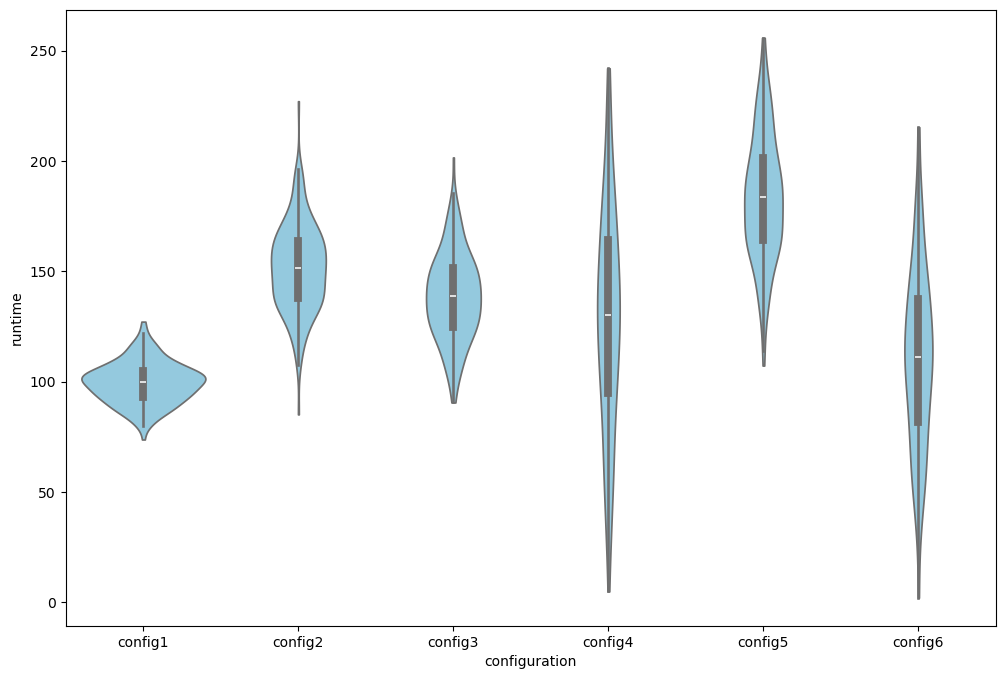

In [6]:
fig, ax = plt.subplots(figsize=(12, 8)) # velikost grafu
sns.violinplot(x="configuration", y="runtime", data=df, color="skyblue", order=["config1", "config2", "config3", "config4", "config5", "config6"], cut=0)
# oříznuté hodnoty u 0, protože čas nemůže být menší než 0
# plotnutí dat do violinplotu

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte  výsledky z tabulky._

**Odpověď**

K zobrazení dat jsem si vybral violin graph. Vhodný by také byl boxplot, v tom se ale neukazuje reálné rozložení dat a proto by někdy mohl zkreslovat (Pro krásnou ukázku např.: https://i.sstatic.net/XtUDXPcg.gif).

Z grafů jde na první pohled poznat, že střední hodnota konfigurací 2, 3 a 5 je mnohem vyšší než ostatní, takže se jima dopodrobna zabývat nebudu, jelikož jsou to námi nehledané algoritmy protože je na první pohled můžeme vyřadit.

Konfigurace 4 a 6 jsou již zajímavější, jelikož mají velké rozdíly v časech běžení. V porovnání extrémních hodnot vede 4 - má nižší minimum a zároveň vyšší maximum oproti 6, ale většina dat z konfigurace 6 je rychlejších, to jde vidět na průměrech. IQR konfigurace 6 je níže než ve 4 konfiguraci (to jde ostatně vidět už v boxplot grafech).

V porovnání s první konfiguraci, která je soustředěna všema hodnotama (t.j. maximem i minimem) kolem 100, jsou konfigurace 4 a 6 soustředěný na široké škále. První konfigurace se zdá nejstabilnější, hodnoty jsou soustředěny velice blízko sebe a nemá to tak velké rozdíly mezi minimy a maximy, takže už na první pohled vypadá, že by mohl být kvalitní volba, jelikož máme jistotu že nikdy nepoběží výrazně déle než je průměrný čas, což se nedá o 4 a 6 konfiguraci říct. Zároveň má nejnižší IQR.

Více komentování ohledně 1 a 6 v další otázce.

## Určení efektivity konfigurací algoritmů
Nás ale zajímá, jaká konfigurace je nejrychlejší. Z výše vykresleného grafu můžeme vyloučit některé konfigurace. Existuje tam však minimálně jedna dvojice, u které nedokážeme jednoznačně určit, která je lepší - pokud nebudeme porovnávat pouze extrémní hodnoty, které mohou být dané náhodou, ale celkově. Proto proveďte vhodný test významnosti - v následující části diskutujte zejména rozložení dat (i s odkazem na předchozí buňky, variabilitu vs polohu a podobně). Je nutné každý logický krok a výběry statistických funkcí komentovat. 

Vužijte vhodnou funkci z knihovny `scipy.stats` a funkci poté __implementujte sami__ na základě základních matematických funkcí knihovny `numpy` případně i funkcí pro výpočet vybraného rozložení v [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Při vlastní implementaci není nutné se primárně soustředit na efektivitu výpočtu (není potřeba využít všechny funkce numpy, můžete použít normální cykly a podobně - v hodnocení však bude zahrnuta přehlednost a neměly by se objevit jasné chyby, jako je zvýšení třídy složitosti a podobně).

__OTÁZKA K DOPLNĚNÍ:__

_Jaká data budete zkoumat? Jaké mají rozložení a parametry (např. varianci) a jaký test použijete? Jaká je nulová hypotéza? Jak se liší variabilita a poloha vybraných konfigurací?_

**Odpověď**

Budeme testovat konfigurace 1 a 6. Jak jsem psal výše, tak konfigurace 1 má nejlepší IQR, ALE konfigurace 6 má IQR přes celé IQR konfigurace 1 a také má významné množství hodnot ještě níže, proto musíme otestovat jestli náhodou nebude používání 6. konfigurace výhodnější než používání první konfigurace.

Rozložení mají obě konfigurace normální. První konfigurace má minimální varianci v porovnání s šestou konfigurací(9^2 oproti 36^2, viz předchozí tabulka s deskriptivním popisem hodnot).

Použiji t-test, s hypotézou, že se střední hodnoty rovnají a jako alternativní hypotézu použiji, že první algoritmus je rychlejší než druhý. Zároveň použijeme ttest_ind a ne ttest_rel, jelikož naměřené hodnoty jsou na sobě nezávislé. (něco jako hod kostkou, první hod nijak neovlivní druhý hod (první běh programu neovlivní druhý běh)).

In [7]:
# H0 = "Střední hodnoty konfigurace 1 a 6 jsou stejné"
# H1 = "Střední hodnoty konfigurace 1 jsou menší než střední hodnoty konfigurace 6"

alpha = 0.05 # mnou určená maximální pravděpodobnost chyby 1. druhu, mohla by být i jiná - například 0.01

t_stat, p_val = stats.ttest_ind(df[config1]["runtime"], df[config6]["runtime"], nan_policy="raise", alternative="less")
#alternative="less" - testujeme, zda je průměr konfigurace 1 menší než konfigurace 6
#nan_policy="raise" - pokud se v datech vyskytnou NaN hodnoty, vyhodí chybu - nemusí být, ale pro jistotu

print("t-statistic: ", t_stat)
print("p-value: ", p_val)

if p_val < alpha: # pokud je p_value < alpha, zamítáme nulovou hypotézu
    print("H0 je zamítnuta")
    print("Konfigurace 1 je rychlejší než konfigurace 6")
else: # zamítáme alternativní hypotézu a nezamítáme nulovou hypotézu
    print("H0 není zamítnuta")
    print("Konfigurace 1 není rychlejší než konfigurace 6")
    

t-statistic:  -3.5907571120906288
p-value:  0.00018590603789137036
H0 je zamítnuta
Konfigurace 1 je rychlejší než konfigurace 6


__OTÁZKA K DOPLNĚNÍ:__

_Jaký je závěr statistického testu?_

**Odpověď**

Závěr statistického testu je, že střední hodnoty první a šesté konfigurace nejsou stejné, díky zvolené alternativní hypotéze víme, že první konfigurace je rychlejší než druhá s možnou chybou maximálně 5% (alpha). Tzn že s 95% přesností můžeme říct, že konfigurace 1 je menší(tím pádem rychlejší) než konfigurace 6 a proto bychom při výběru správného algoritmu měli vybrat první konfiguraci,

### Vlastní implementace
Implementujte stejný test pomocí knihovních funkcí a ukažte, že je výsledek stejný.

In [8]:
# H0 = "Střední hodnoty konfigurace 1 a 6 jsou stejné"
# H1 = "Střední hodnoty konfigurace 1 jsou menší než střední hodnoty konfigurace 6"

# Délky výběrů
len1 = len(df[config1]["runtime"])
len6 = len(df[config6]["runtime"])

# Průměry
mean1 = np.mean(df[config1]["runtime"])
mean6 = np.mean(df[config6]["runtime"])

# Rozptyly
var1 = np.var(df[config1]["runtime"], ddof=1)
var6 = np.var(df[config6]["runtime"], ddof=1)

# Spojená směrodatná odchylka podle vzorce
pooled_std = np.sqrt(((len1 - 1) * var1 + (len6 - 1) * var6) / (len1 + len6 - 2))

# Výpočet t-statistiky podle vzorce
t_statistic = (mean1 - mean6) / (pooled_std * np.sqrt(1/len1 + 1/len6))

# Výpočet stupňů volnosti - počet pozorování mínus dva (jeden stupěň volnosti pro každý výběr)
df = len1 + len6 - 2

# Výpočet p-hodnoty
p_value = stats.t.cdf(t_statistic, df)

# Výsledky
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Porovnání výsledků s funkcí ttest_ind
if(p_val == p_value):
    print("P-hodnoty se rovnají")
if(t_stat == t_statistic):
    print("t-statistiky se rovnají")


t-statistic: -3.5907571120906288
p-value: 0.00018590603789137036
P-hodnoty se rovnají
t-statistiky se rovnají
